## Get to know a stock of interest

In [ ]:
# Step 1: Install Required Libraries
!pip install yfinance --quiet
!pip install scikit-learn --quiet
!pip install matplotlib --quiet
!pip install --upgrade yfinance
!pip install tensorflow
!pip install ta

In [1]:

# Step 2: Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import ta 

In [24]:
# 🧾 Step 3: Define ticker and load data
ticker = "AAPL"  # You can change this
stock = yf.Ticker(ticker)
data = yf.download(ticker, start='2018-01-01', end='2024-12-31')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

print(f"\n✅ Loaded {len(data)} rows of data for {ticker}")
display(data.head())


[*********************100%***********************]  1 of 1 completed


✅ Loaded 1760 rows of data for AAPL


Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,39.933986,40.436212,39.722768,40.426823,102223600
2018-01-03,40.490179,40.964244,40.356411,40.419773,118071600
2018-01-04,40.492539,40.710798,40.384586,40.607536,89738400
2018-01-05,40.703754,41.156695,40.612227,41.069862,94640000
2018-01-08,40.917320,41.213022,40.818749,40.917320,82271200


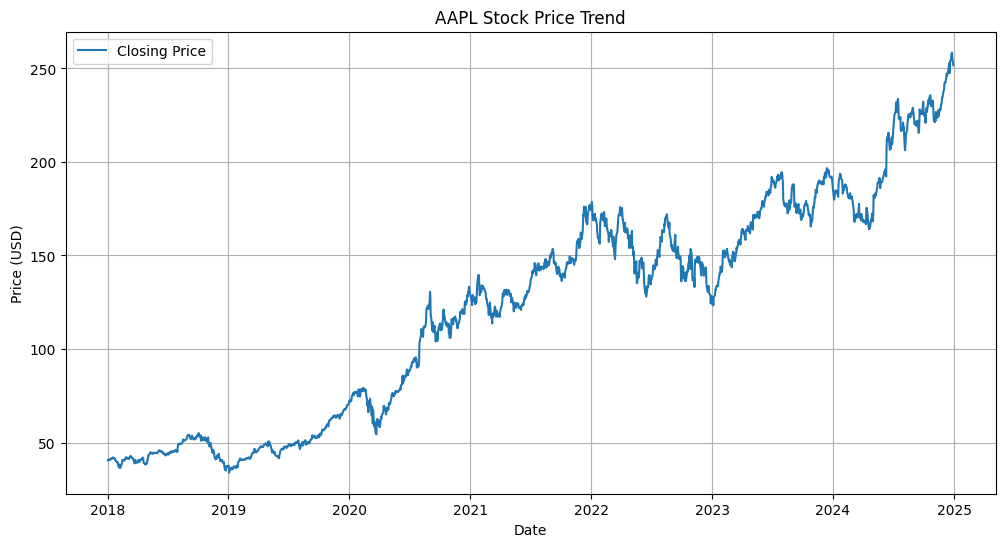

In [25]:
# Step 4: Visualize Price Trend
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.title(f'{ticker} Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

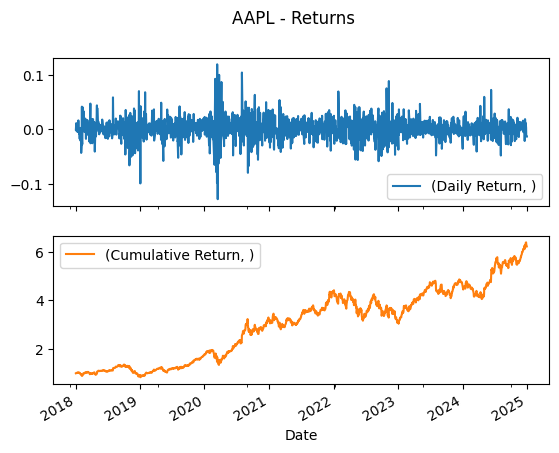

In [26]:
# Returns & Cumulative Return

data['Daily Return'] = data['Close'].pct_change()
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

data[['Daily Return', 'Cumulative Return']].dropna().plot(subplots=True, title=f"{ticker} - Returns")
plt.show()

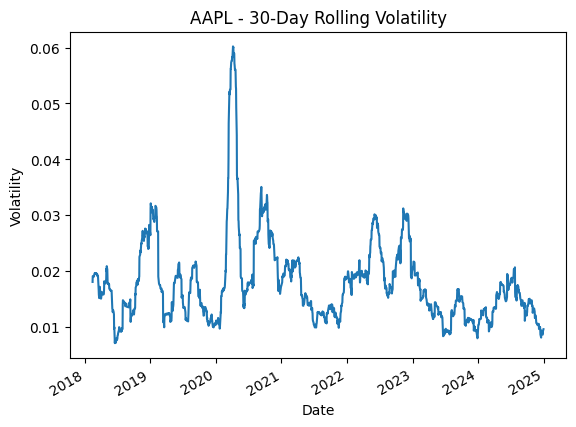

In [27]:
# Volatility (Rolling Std Dev)

data['Volatility (30D)'] = data['Daily Return'].rolling(window=30).std()
data['Volatility (30D)'].plot(title=f"{ticker} - 30-Day Rolling Volatility")
plt.ylabel("Volatility")
plt.show()

In [28]:
data

Price,Open,High,Low,Close,Volume,Daily Return,Cumulative Return,Volatility (30D)
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2018-01-02,39.933986,40.436212,39.722768,40.426823,102223600,NaN,NaN,NaN
2018-01-03,40.490179,40.964244,40.356411,40.419773,118071600,-0.000174,0.999826,NaN
2018-01-04,40.492539,40.710798,40.384586,40.607536,89738400,0.004645,1.004470,NaN
2018-01-05,40.703754,41.156695,40.612227,41.069862,94640000,0.011385,1.015906,NaN
2018-01-08,40.917320,41.213022,40.818749,40.917320,82271200,-0.003714,1.012133,NaN
...,...,...,...,...,...,...,...,...
2024-12-23,254.156919,255.034791,252.840088,254.655716,40858800,0.003065,6.299177,0.009042
2024-12-24,254.875189,257.588630,254.675658,257.578674,23234700,0.011478,6.371480,0.008616


In [10]:
info = stock.info
print("\n📊 Key Fundamentals:")
for key in ['sector', 'industry', 'marketCap', 'trailingPE', 'forwardPE', 'dividendYield', 'beta']:
    print(f"{key:>15}: {info.get(key)}")


📊 Key Fundamentals:
         sector: Technology
       industry: Consumer Electronics
      marketCap: 2969087508480
     trailingPE: 31.01248
      forwardPE: 23.92178
  dividendYield: 0.52
           beta: 1.275


In [15]:
stock.quarterly_earnings

In [16]:
# Get quarterly earnings
earnings = stock.quarterly_earnings

print("\n📆 Quarterly Earnings (raw):")
print(earnings)

# Check if earnings is valid and plot
if isinstance(earnings, pd.DataFrame) and not earnings.empty:
    earnings.plot(y='Earnings', title=f"{ticker} - Quarterly Earnings")
    plt.show()
else:
    print("❌ Quarterly earnings data not available for this ticker.")


📆 Quarterly Earnings (raw):
None
❌ Quarterly earnings data not available for this ticker.


## Prediction

### Linear regression prediction

In [33]:
# Feature Engineering for Prediction
data['Days'] = (data.index - data.index[0]).days
X = data[['Days']]
y = data['Close']

In [34]:
# Train/Test Split and Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

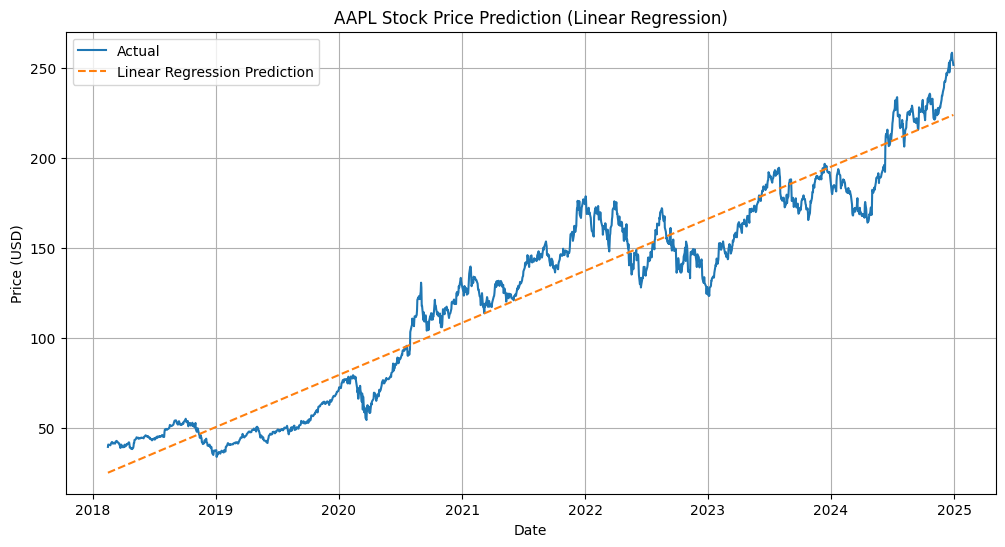

In [35]:

data['Predicted'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index, data['Predicted'], label='Linear Regression Prediction', linestyle='--')
plt.title(f'{ticker} Stock Price Prediction (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Show Model Performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

Mean Squared Error on Test Set: 288.79


### NN Prediction

[*********************100%***********************]  1 of 1 completed

Epoch 1/20



c:\Users\ivydi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0265   
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057 
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021     
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 
Epoch 13/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015     
Epoch 14/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 
Epoch 15/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 
Epoch

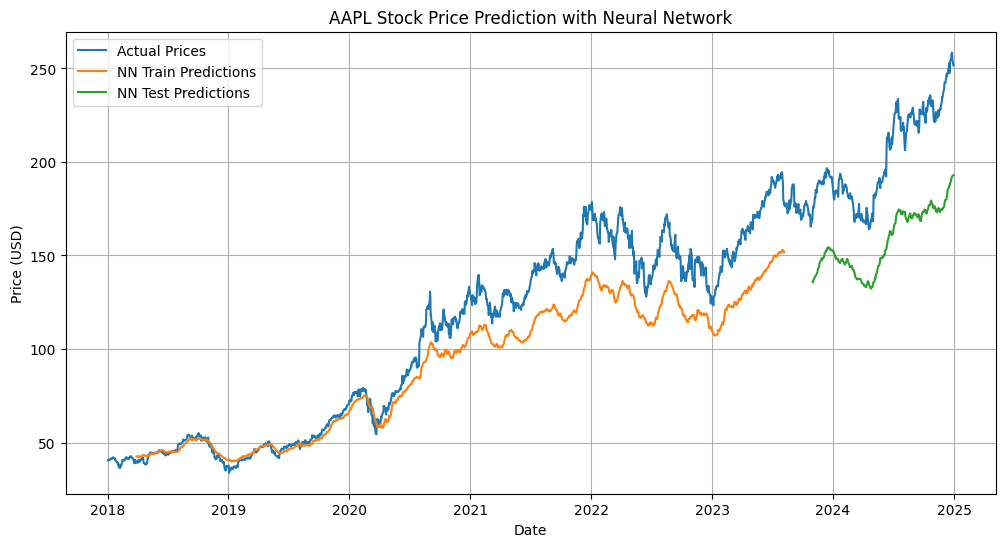

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
NN Predicted price for next trading day: $193.06


In [38]:
# Standard Neural Network Model for Stock Price Prediction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Create datasets with lookback period
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Data preparation - using the same ticker as before
data = yf.download(ticker, start='2018-01-01', end='2024-12-31')
dataset = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size:, :]

# Create datasets with lookback period (using same function as before)
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Flatten input for standard neural network
# Standard NN doesn't need time step dimension like LSTM/RNN
X_train_nn = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_nn = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Build standard neural network model
nn_model = Sequential()
nn_model.add(Dense(units=100, activation='relu', input_dim=time_step))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units=50, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units=25, activation='relu'))
nn_model.add(Dense(units=1))

# Compile and fit the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train_nn, y_train, batch_size=32, epochs=20, verbose=1)

# Make predictions
train_predict = nn_model.predict(X_train_nn)
test_predict = nn_model.predict(X_test_nn)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
print(f'NN Train RMSE: {train_rmse:.2f}')
print(f'NN Test RMSE: {test_rmse:.2f}')

# Visualize the prediction results
# Shift train predictions for plotting
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Shift test predictions for plotting
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2):len(dataset), :] = test_predict

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Prices')
plt.plot(data.index, train_predict_plot, label='NN Train Predictions')
plt.plot(data.index, test_predict_plot, label='NN Test Predictions')
plt.title(f'{ticker} Stock Price Prediction with Neural Network')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Future prediction
# Use last 60 days to predict the next day
last_60_days = scaled_data[-60:]
X_future = last_60_days.reshape(1, time_step)  # Flattened for NN
future_price = nn_model.predict(X_future)
future_price = scaler.inverse_transform(future_price)
print(f"NN Predicted price for next trading day: ${future_price[0][0]:.2f}")

### RNN Prediction

[*********************100%***********************]  1 of 1 completed

Epoch 1/20



c:\Users\ivydi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0772
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017
Epoch 13/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 14/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013
Epoch 15/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012
Epoch 16/20
43/43 ━━━━━━━━━━━━

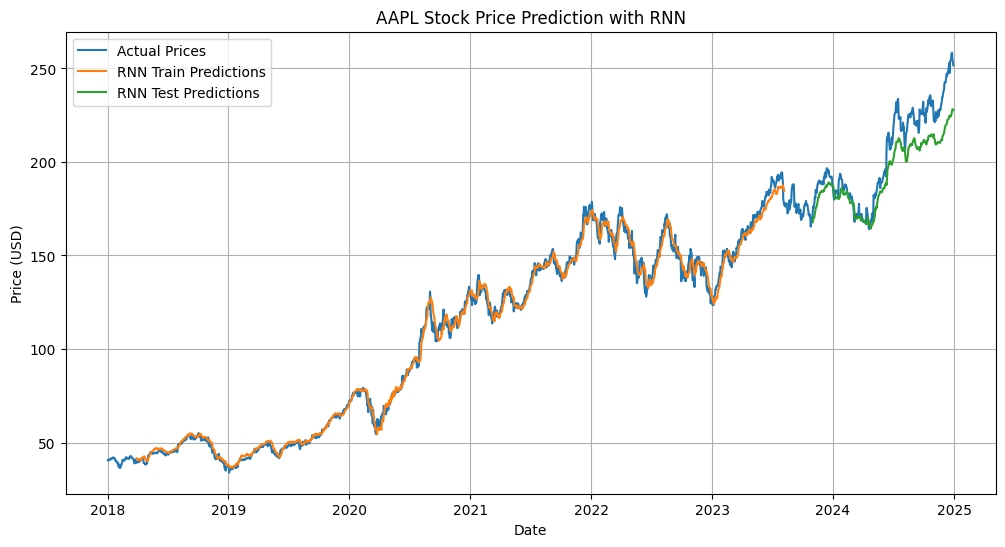

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RNN Predicted price for next trading day: $227.64


In [39]:
# RNN Model for Stock Price Prediction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Data preparation - using the same ticker as before
data = yf.download(ticker, start='2018-01-01', end='2024-12-31')
dataset = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size:, :]

# Create datasets with lookback period (using same function as LSTM)
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input for RNN [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(time_step, 1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(units=50, return_sequences=False))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(units=25))
rnn_model.add(Dense(units=1))

# Compile and fit the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)

# Make predictions
train_predict = rnn_model.predict(X_train)
test_predict = rnn_model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
print(f'RNN Train RMSE: {train_rmse:.2f}')
print(f'RNN Test RMSE: {test_rmse:.2f}')

# Visualize the prediction results
# Shift train predictions for plotting
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Shift test predictions for plotting
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2):len(dataset), :] = test_predict

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Prices')
plt.plot(data.index, train_predict_plot, label='RNN Train Predictions')
plt.plot(data.index, test_predict_plot, label='RNN Test Predictions')
plt.title(f'{ticker} Stock Price Prediction with RNN')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Future prediction
# Use last 60 days to predict the next day
last_60_days = scaled_data[-60:]
X_future = last_60_days.reshape(1, time_step, 1)
future_price = rnn_model.predict(X_future)
future_price = scaler.inverse_transform(future_price)
print(f"RNN Predicted price for next trading day: ${future_price[0][0]:.2f}")


### LSTM Prediction

[*********************100%***********************]  1 of 1 completed

Epoch 1/20



c:\Users\ivydi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0419
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0023
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0018
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0022
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0013
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.5615e-04
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.8458e-04
Epoch 13/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011
Epoch 14/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.7617e-04
Epoch 15/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.4600e-04

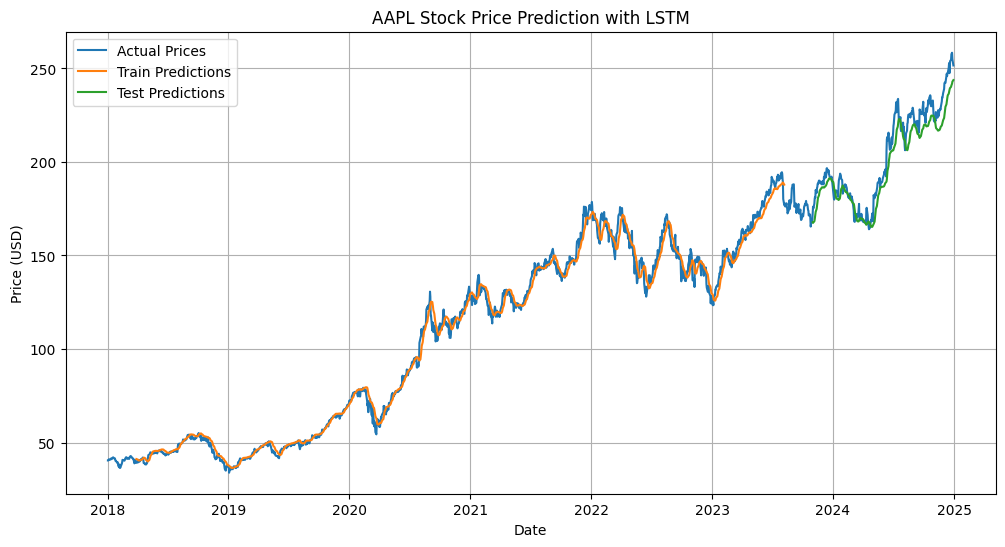

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted price for next trading day: $244.12


In [40]:
# Step 9: LSTM Model for Stock Price Prediction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# Data preparation
data = yf.download(ticker, start='2018-01-01', end='2024-12-31')
dataset = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size:, :]



time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# Visualize the prediction results
# Shift train predictions for plotting
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Shift test predictions for plotting
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2):len(dataset), :] = test_predict

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Prices')
plt.plot(data.index, train_predict_plot, label='Train Predictions')
plt.plot(data.index, test_predict_plot, label='Test Predictions')
plt.title(f'{ticker} Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Future prediction
# Use last 60 days to predict the next day
last_60_days = scaled_data[-60:]
X_future = last_60_days.reshape(1, time_step, 1)
future_price = model.predict(X_future)
future_price = scaler.inverse_transform(future_price)
print(f"Predicted price for next trading day: ${future_price[0][0]:.2f}")